In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.fft as fft
import matplotlib.ticker as tck

In [2]:
xs = np.linspace(-np.pi, np.pi, num=500)

# Figure 2(a)

In [3]:
def ntk(theta, tau=1):
    # analytic formula, with respect to 0
    return (1 + np.cos(theta)) * np.exp(tau * (np.cos(theta) - 1))

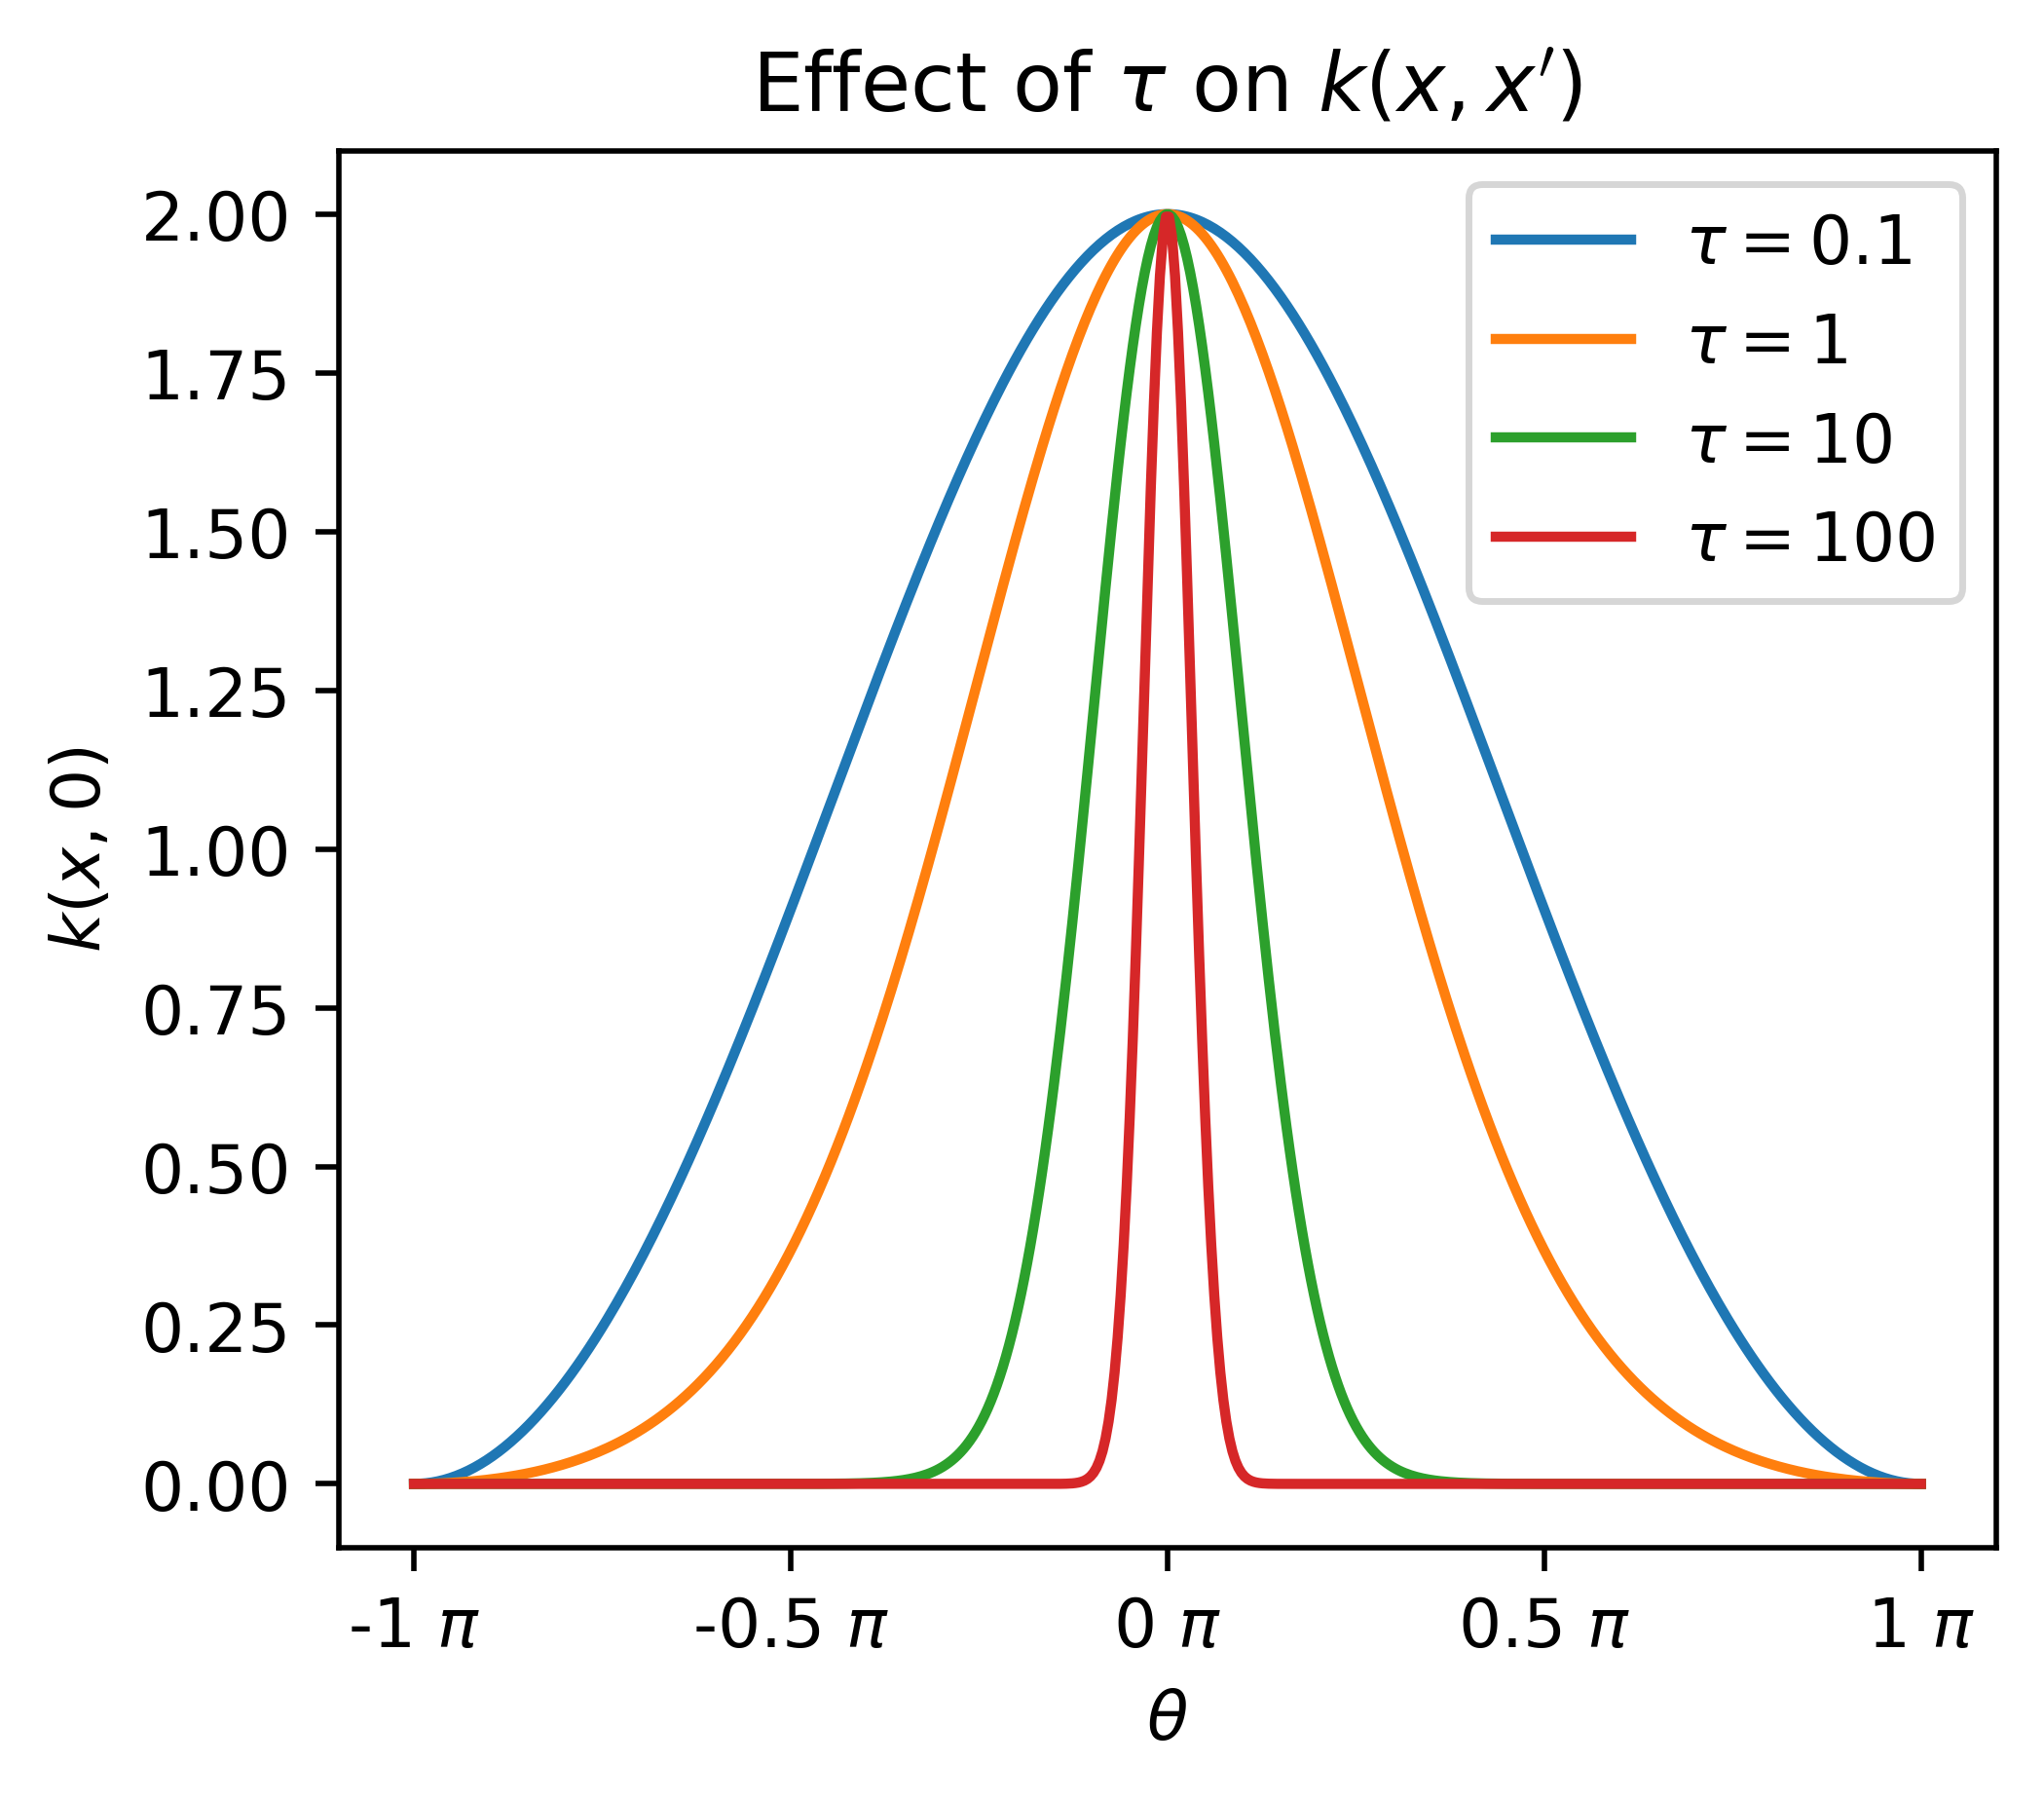

In [4]:
# matplotlib.rcParams.update({'font.size': 13})
plt.figure(dpi=500, figsize=(4, 3.5))
for tau in [0.1, 1, 10, 100]:
# for tau in [0.01, 0.1, 1, 10]:
    plt.plot(xs / np.pi, ntk(xs, tau=tau), label=f'$\\tau = {tau}$')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('$k(x, 0)$')
plt.title("Effect of $\\tau$ on $k(x, x')$")
ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.tight_layout(pad=0)
plt.savefig('tau_class.pdf')

# Figure 2(b)

In [5]:
def ntk_B_no_unit_circle(xs, tau=1):
    # analytic formula, with respect to 0
    return np.matmul(xs, np.array([[1, 0]])) * np.exp(tau * (np.cos(theta) - 1))

In [8]:
def ntk_w(theta, tau=1):
    # analytic formula, with respect to 0
    return np.exp(tau * (np.cos(theta) - 1))

def finite_approx_w(theta, tau=1, width=1024):
    w = np.random.normal(size=(width, 1))
    B = np.random.normal(scale=np.sqrt(tau), size=(width//2, 2))
    x = np.c_[np.cos(theta), np.sin(theta)]
    x_0 = np.array([[1, 0]])
    w_grad_0 = np.sqrt(2 / width) * np.concatenate([np.sin(B @ x_0.T).T, np.cos(B @ x_0.T).T], axis=1)
    w_grad = np.sqrt(2 / width) * np.concatenate([np.sin(B @ x.T).T, np.cos(B @ x.T).T], axis=1)
    return (w_grad_0 * w_grad).sum(axis=1)

def ntk_B(theta, tau=1):
    # analytic formula, with respect to 0
    return (np.cos(theta)) * np.exp(tau * (np.cos(theta) - 1))

def finite_approx_B(theta, tau=1, width=2048):
    w = np.random.normal(size=(width, 1))
    w_first = w[:width//2,:]
    w_second = w[width//2:,:]
    B = np.random.normal(scale=np.sqrt(tau), size=(width//2, 2))
    x = np.c_[np.cos(theta), np.sin(theta)]
    x_0 = np.array([[1, 0]])
    B_grad_0 = x_0 * np.sqrt(2 / width) * (w_first * np.cos(B @ x_0.T) - w_second * np.sin(B @ x_0.T))
    B_grad = x[np.newaxis,:,:] * np.sqrt(2 / width) * ((w_first * np.cos(B @ x.T) - w_second * np.sin(B @ x.T))[:,:,None])
    return (B_grad_0[:,np.newaxis,:] * B_grad).sum(axis=(0, 2))
    

def finite_approx(theta, tau=1, width=1024):
    return finite_approx_w(theta, tau, width) + finite_approx_B(theta, tau, width)

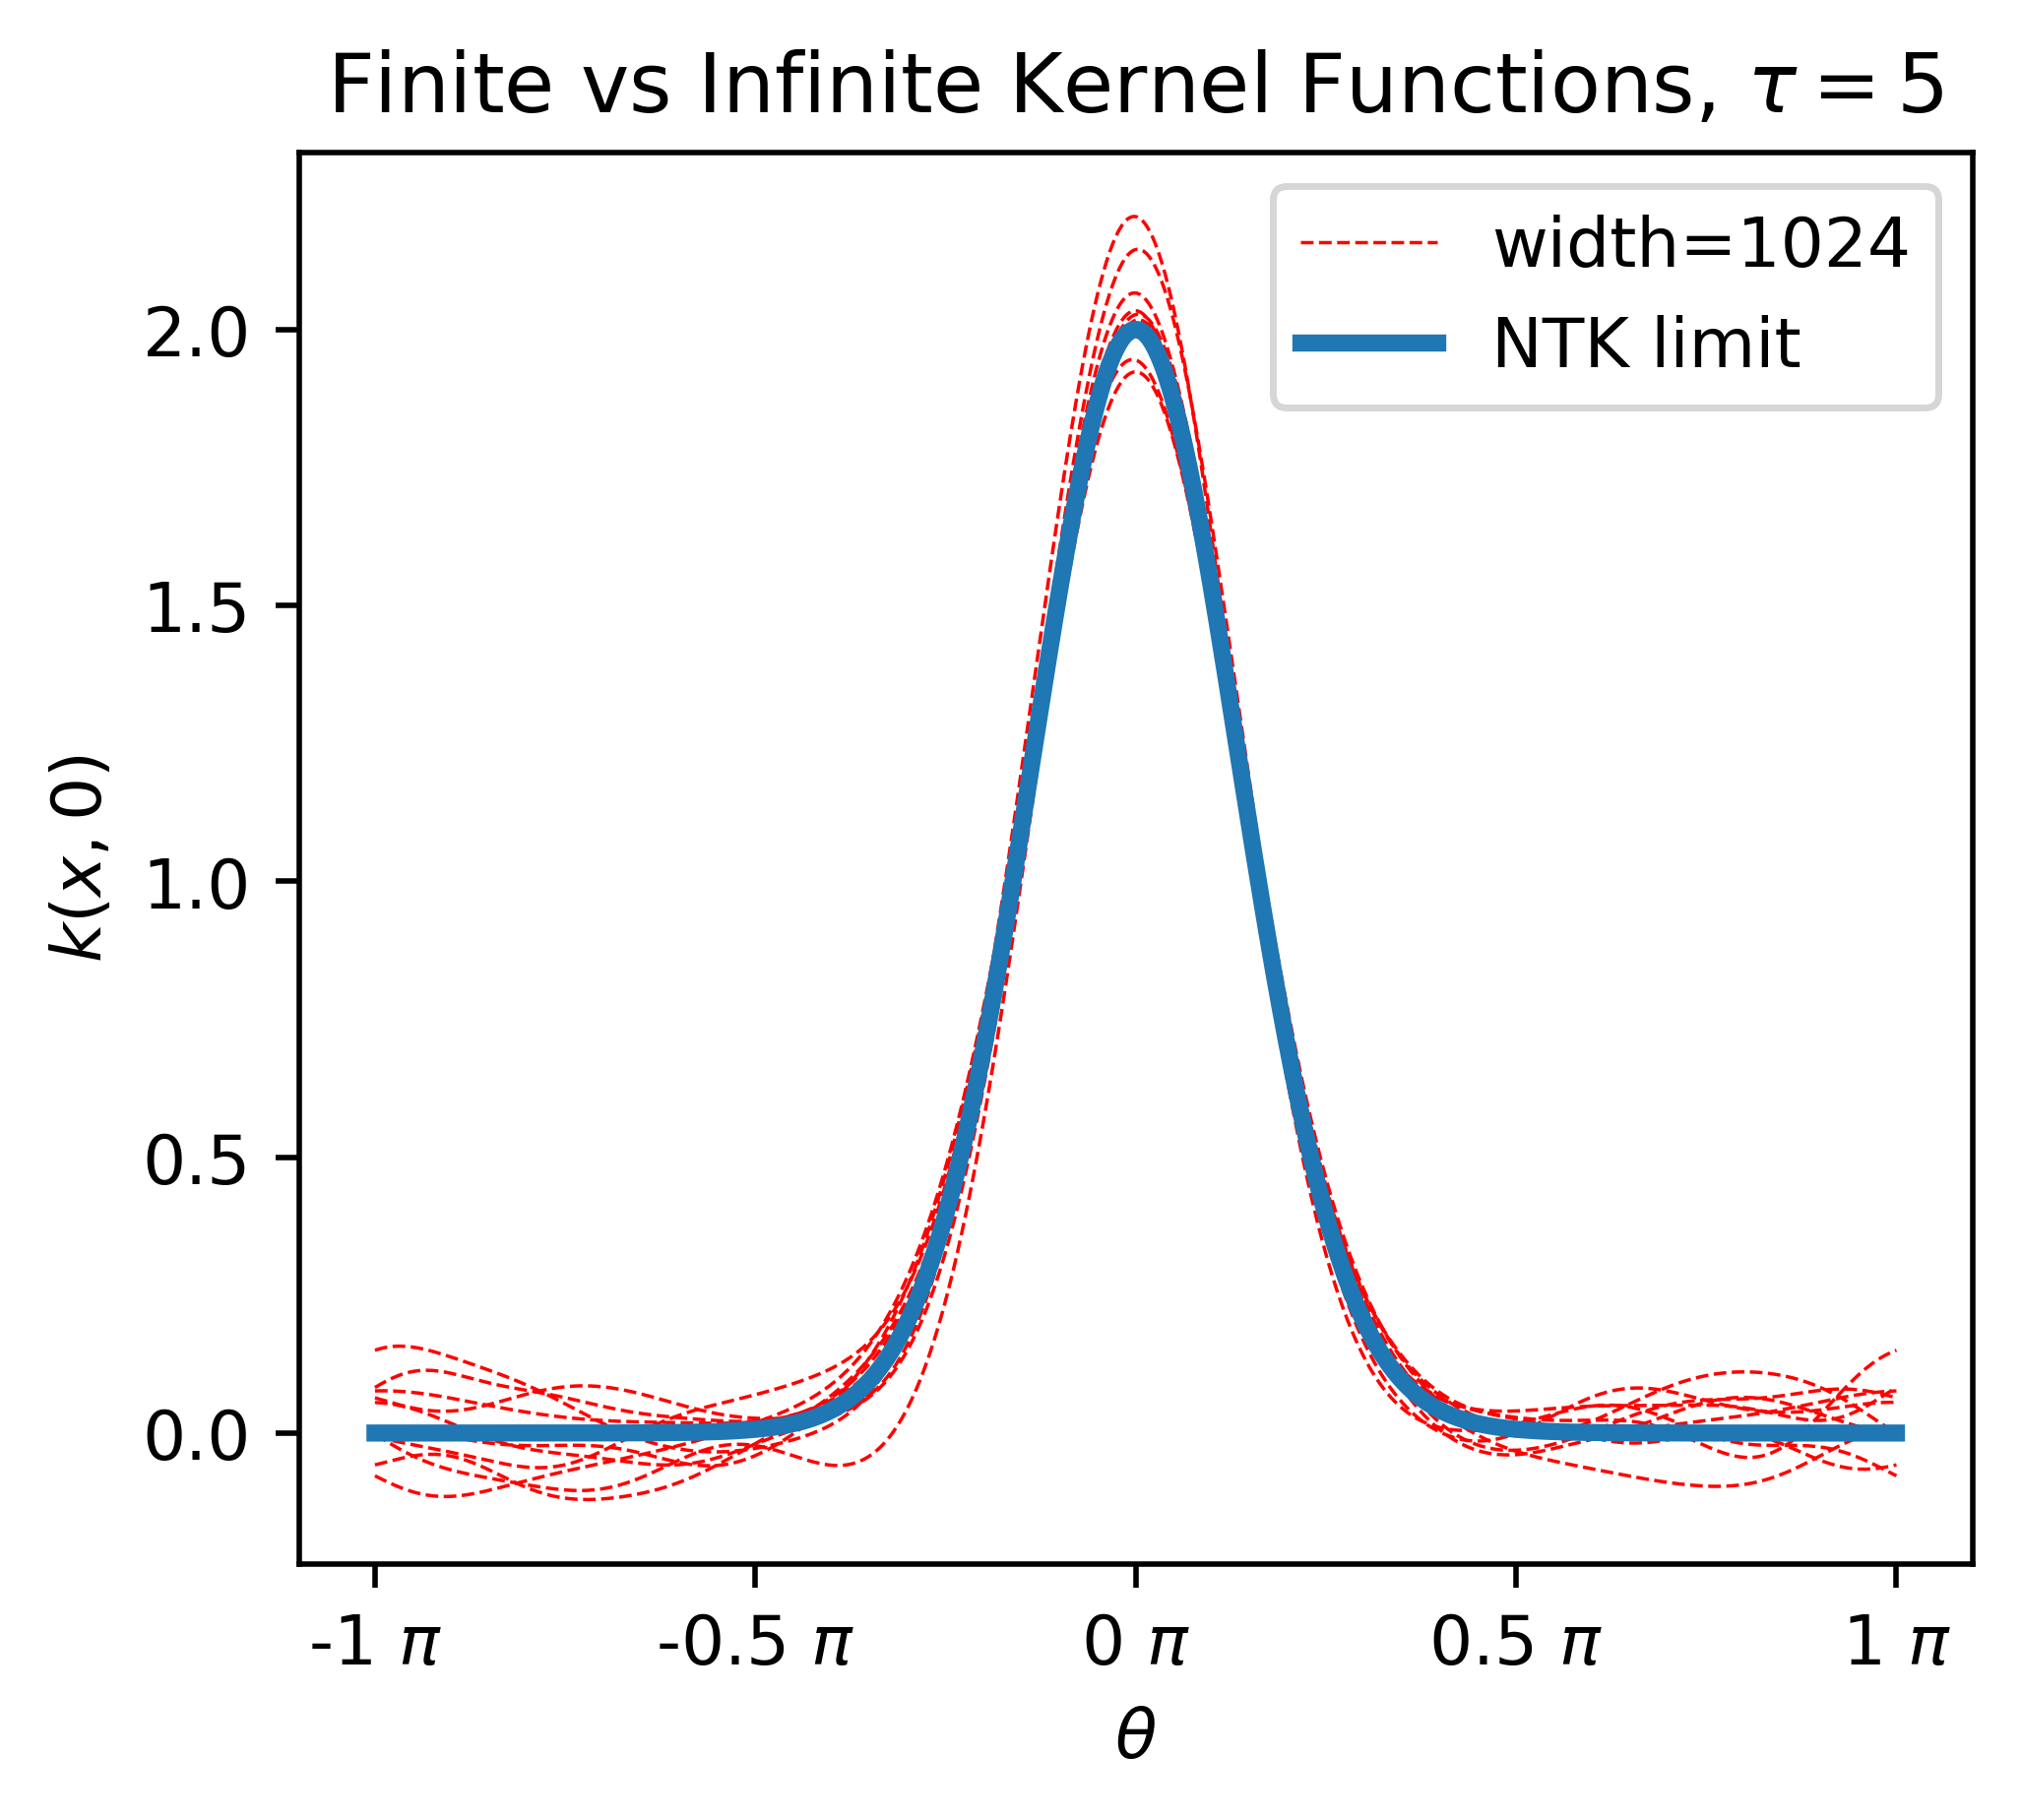

In [9]:
tau = 5
width = 2**10
n = 10

plt.figure(dpi=500, figsize=(4, 3.5))
plt.plot(xs/np.pi, finite_approx(xs, tau=tau, width=width), linestyle='--', c='r', linewidth=0.5, label=f'width={width}')
for _ in range(n-1):
    plt.plot(xs/np.pi, finite_approx(xs, tau=tau, width=width), linestyle='--', c='r', linewidth=0.5)
plt.plot(xs/np.pi, ntk(xs, tau=tau), linewidth=2.5, label='NTK limit')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('$k(x, 0)$')
plt.title(f'Finite vs Infinite Kernel Functions, $\\tau = {tau}$')
ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
plt.tight_layout(pad=0)
plt.savefig('ntk_class.pdf')

In [10]:
# Figure 2(c)

In [11]:
n = 1024
thetas = np.linspace(-np.pi, np.pi, num=n)

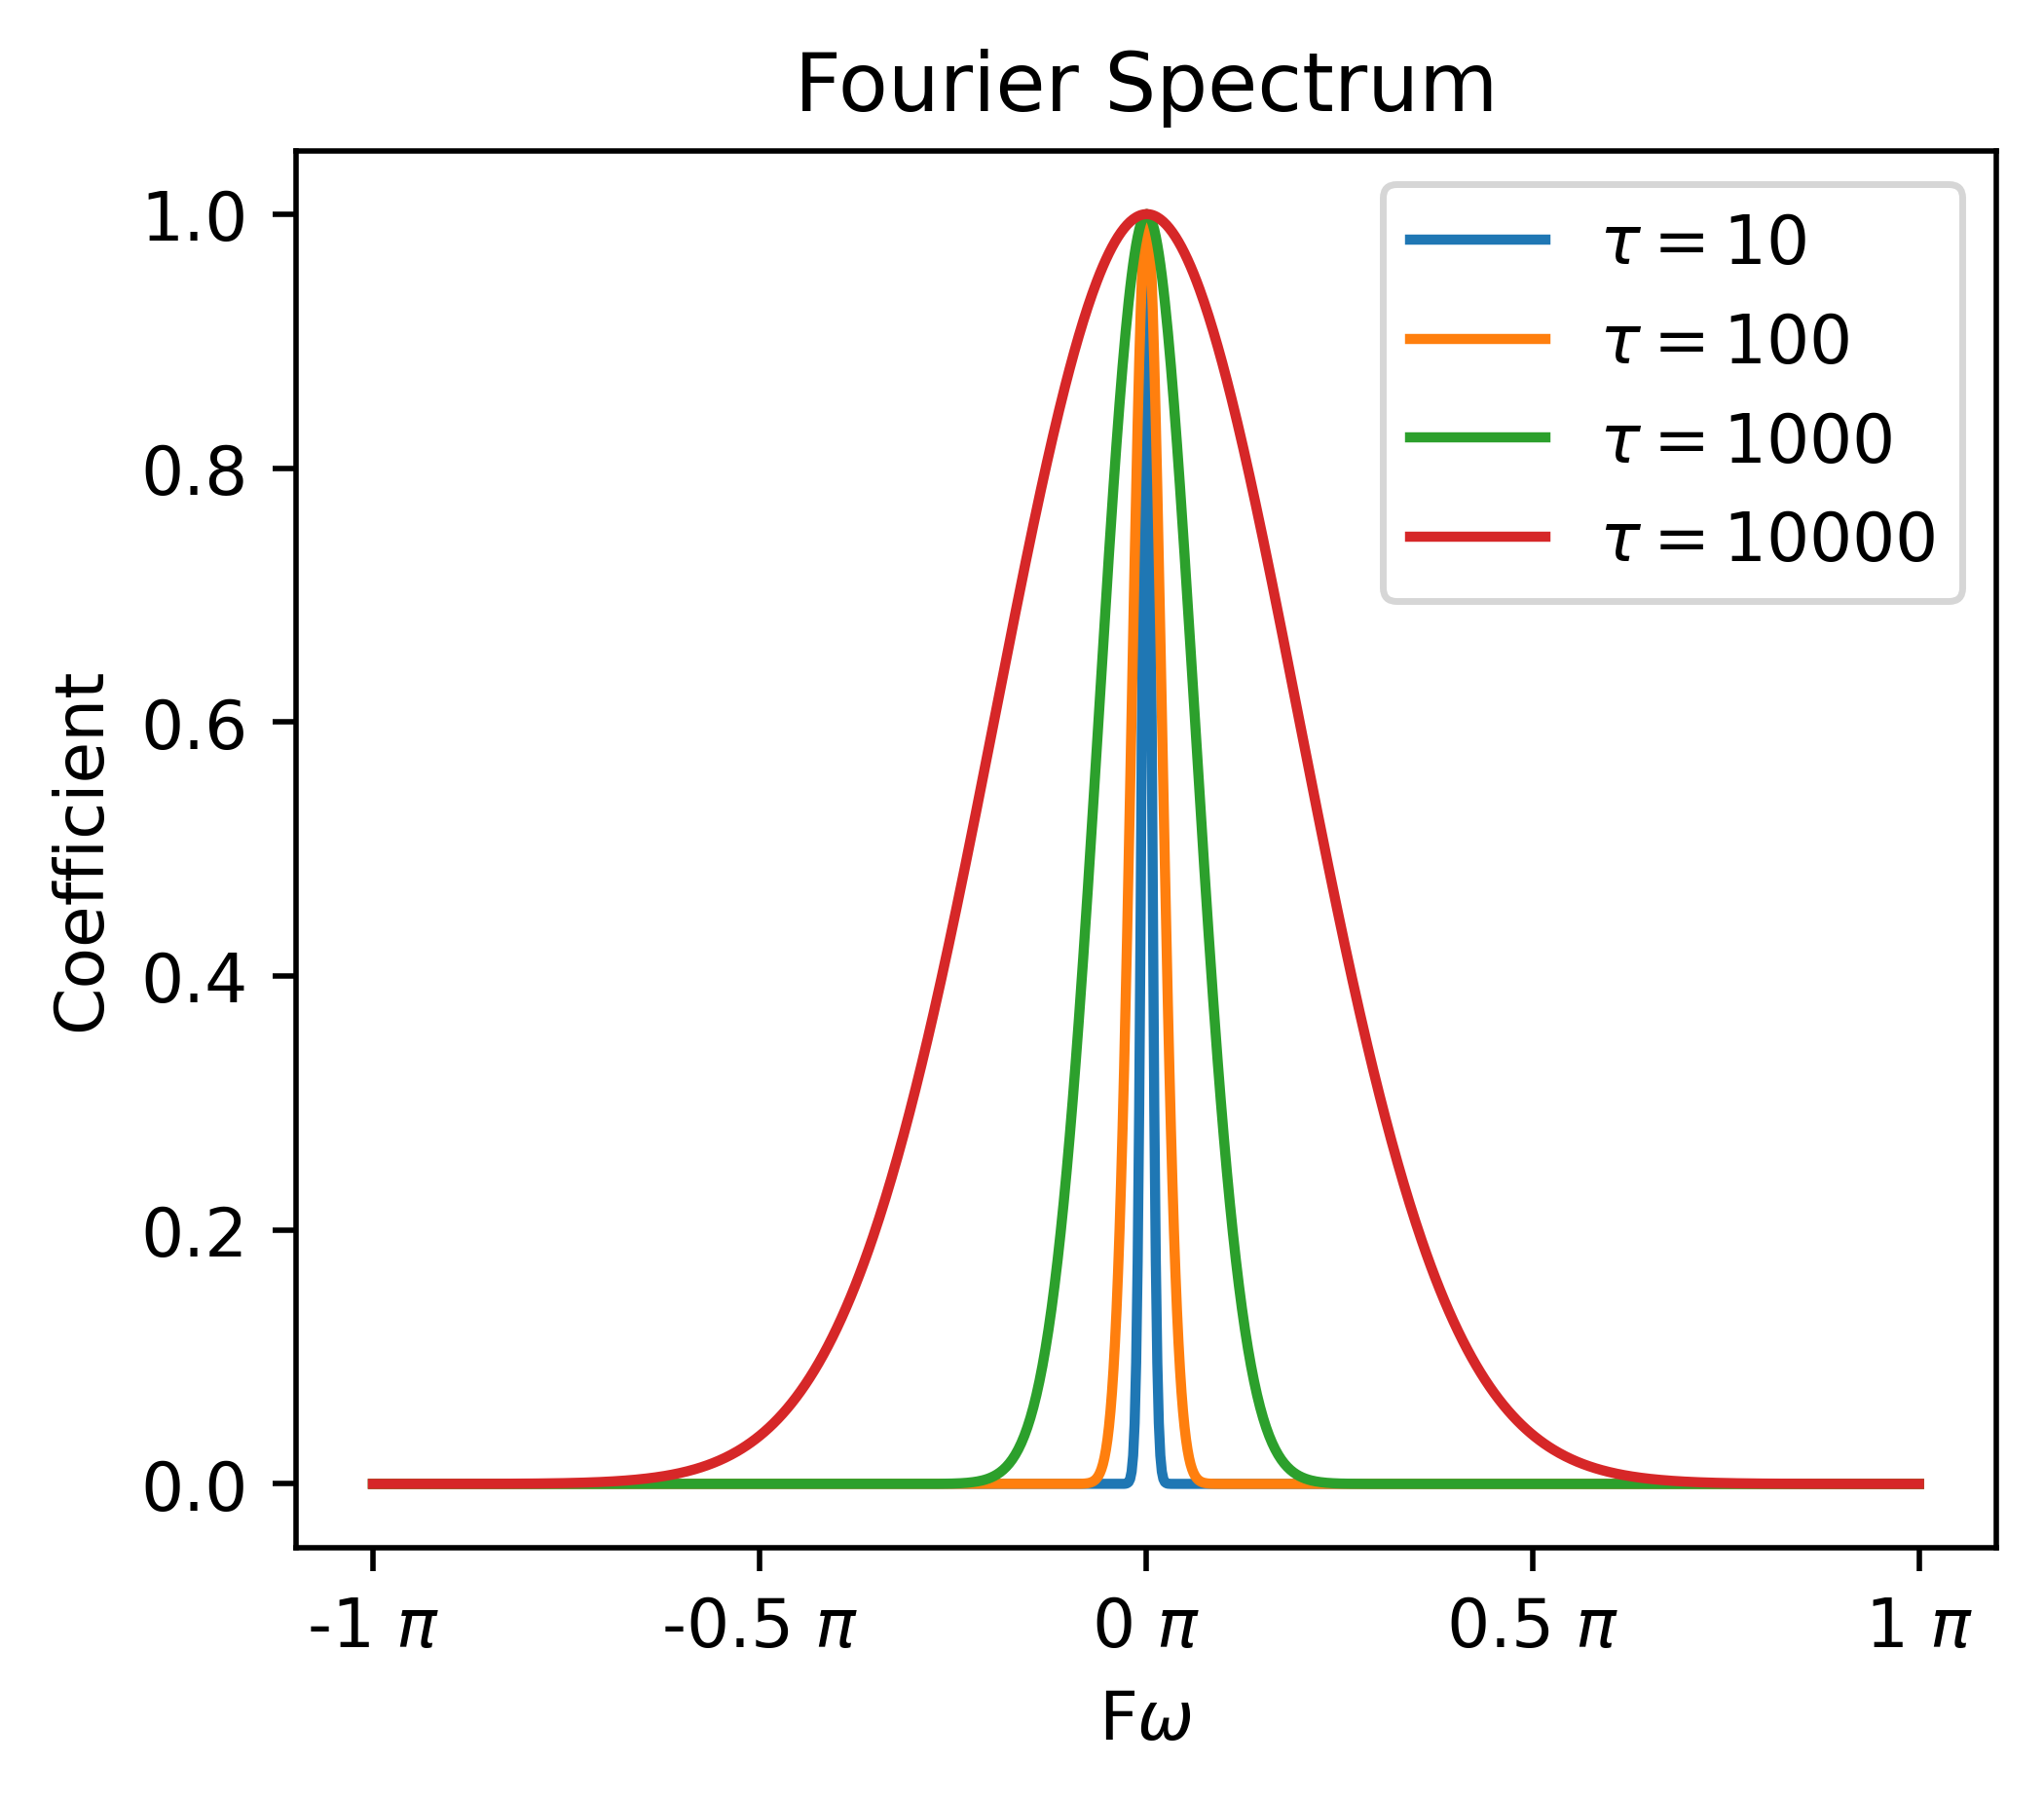

In [12]:
plt.figure(dpi=500, figsize=(4, 3.5))
for tau in [10, 100, 1000, 10000]:
    row = ntk(thetas, tau=tau)
    to_plot = np.abs(np.fft.fftshift(np.fft.fft(row, norm='ortho')))
    to_plot /= max(to_plot)
    plt.plot(thetas / np.pi, to_plot, label=f'$\\tau={tau}$')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# plt.yscale('log')
plt.xlabel('F$\\omega$')
# plt.ylabel('Normalized coefficient')
plt.ylabel('Coefficient')
plt.title('Fourier Spectrum')
plt.tight_layout(pad=0)
plt.savefig('spectrum_class.pdf')